<a href="https://colab.research.google.com/github/eminshall/Notebooks-Youtube-Channel/blob/main/Simulating_Stock_Price_Dynamics_with_Geometric_Brownian_Motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
symbol = 'XOM'
start = '2023-01-01'
end = '2024-01-31'

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


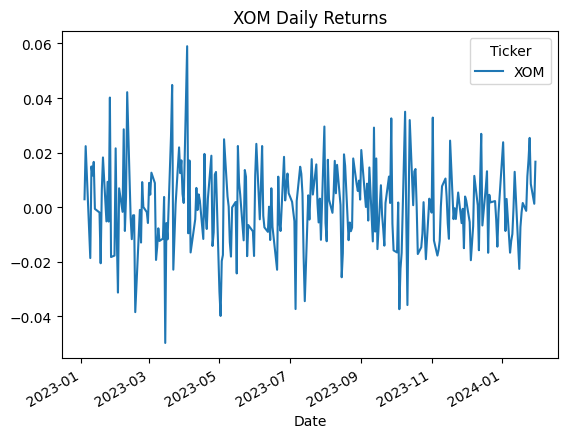

In [ ]:
df = yf.download(symbol,
                 start=start,
                 end=end)

returns = df['Close'].pct_change().dropna()
returns.plot(title=f'{symbol} Daily Returns')
plt.show()

In [ ]:
train = returns.loc[:'2024-01-01']
test = returns.loc['2024-01-01':]

In [ ]:
T = len(test)
N = len(train)
S_0 = df.loc[train.index[-1], 'Close']
n_sims = 100
mu = train.mean()
sigma = train.std()

In [ ]:
def simulate_gbms(s_0, mu, sigma, n_sims, T, N, random_seed=42):
  np.random.seed(random_seed)

  dt = T/N
  dW = np.random.normal(scale=np.sqrt(dt), size=(n_sims, T))
  W = np.cumsum(dW, axis=1)

  time_step = np.linspace(dt, T, T)
  time_steps = np.broadcast_to(time_step, (n_sims, T))

  s_0 = s_0.iloc[0]
  mu_value = mu.iloc[0]
  sigma_value = sigma.iloc[0]

  S_t = s_0 * np.exp(
          (mu_value - 0.5 * sigma_value ** 2) * time_steps + sigma_value * W
  )

  S_t = np.insert(S_t, 0, s_0, axis=1)

  return S_t

In [ ]:
gbm_sims = simulate_gbms(S_0, mu, sigma, n_sims, T, N)
gbm_sims.head()

In [ ]:
sim_df = pd.DataFrame(np.transpose(gbm_sims),index=train.index[-1:].union(test.index))
sim_df.head()

In [ ]:
res_df = sim_df.mean(axis=1).to_frame()
res_df = res_df.join(df['Close'])
res_df.columns = ['simulation_average','close_price']

<Axes: title={'center': 'Simulations Result'}, xlabel='Date'>

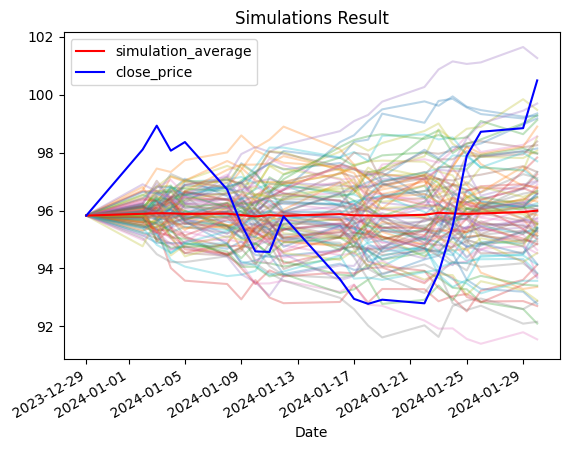

In [ ]:
ax = sim_df.plot(alpha=0.3, legend=False, title='Simulations Result')
res_df.plot(ax=ax, color = ['red','blue'])

In [ ]:
def simulate_gbms(s_0, mu, sigma, n_sims, T, N, random_seed=42, antithetic_var=False):
  np.random.seed(random_seed)

  dt = T/N

  #Improving with antithetic variates
  if antithetic_var:
    dW_ant = np.random.normal(scale=np.sqrt(dt), size=(int(n_sims/2), T+1))
    dW = np.concatenate((dW_ant, -dW_ant), axis=0)
  else:
    dW = np.random.normal(scale=np.sqrt(dt), size=(n_sims, T+1))

  s_0 = s_0.iloc[0]
  mu_value = mu.iloc[0]
  sigma_value = sigma.iloc[0]

  #Improving process with shorter calculation
  S_t = s_0 * np.exp(
      np.cumsum((mu_value - 0.5 * sigma_value ** 2) * dt + sigma_value * dW,
                axis=1))

  S_t[:,0] = s_0

  return S_t

In [ ]:
%timeit gbm_simulations = simulate_gbms(S_0, mu, sigma, n_sims, T, N, antithetic_var=True)

130 µs ± 18.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
%timeit gbm_simulations = simulate_gbms(S_0, mu, sigma, n_sims, T, N, antithetic_var=False)

161 µs ± 24.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
n_sims = 1000
gbm_simulations = simulate_gbms(S_0, mu, sigma, n_sims, T, N, antithetic_var=True)
sim_df = pd.DataFrame(np.transpose(gbm_simulations),index=train.index[-1:].union(test.index))

(21, 1000)


<Figure size 1800x900 with 0 Axes>

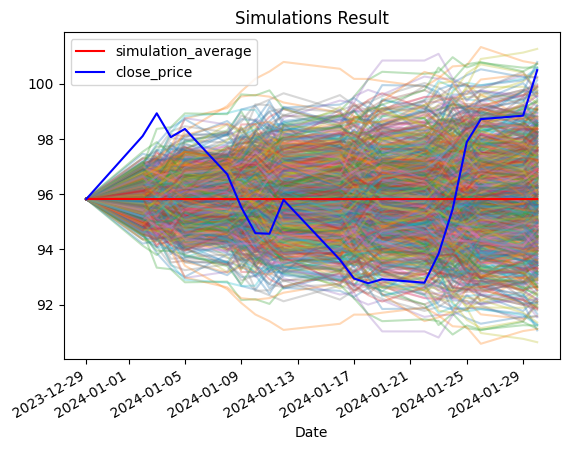

In [ ]:
print(sim_df.shape)
res_df = sim_df.mean(axis=1).to_frame()
res_df = res_df.join(df['Close'])
res_df.columns = ['simulation_average','close_price']

ax = sim_df.plot(alpha=0.3, legend=False, title='Simulations Result')
res_df.plot(ax=ax, color = ['red','blue'])
plt.show()

#Consider Supporting Me

Making theses videos takes time and effort. Contributions from viewers like you help support my channel and avoid the need for promoting a Patreon, sponsors, or selling a course. Click the link and choose any amount you'd like. Thank you.

https://ko-fi.com/minshallsfi